In [1]:
from torch import tensor
from torchmetrics.classification import BinaryROC
import pandas as pd

In [2]:
testing_res = pd.read_csv("/fs/ess/PAS0439/MING/cilates_fungi_classifier/test_res.csv")

In [3]:
possi_reformat_list = []
for index, row in testing_res.iterrows():
    y = row["Y"]
    possi = row["ensembled_possibility"]
    if y == 1:
        possi_reformat = possi
    else:
        possi_reformat = 1 - possi
    possi_reformat_list.append(possi_reformat)
    
testing_res["ensembled_possibility_reformated"] = possi_reformat_list

In [4]:
pred = tensor(testing_res.ensembled_possibility_reformated)
target = tensor(testing_res.Y)

In [5]:
metric = BinaryROC(thresholds=None)
metric(pred, target)  

(tensor([0.0000, 0.0000, 0.0000,  ..., 0.9742, 0.9865, 1.0000]),
 tensor([0.0000, 0.0020, 0.0051,  ..., 1.0000, 1.0000, 1.0000]),
 tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e-07, 6.0000e-08,
         0.0000e+00], dtype=torch.float64))

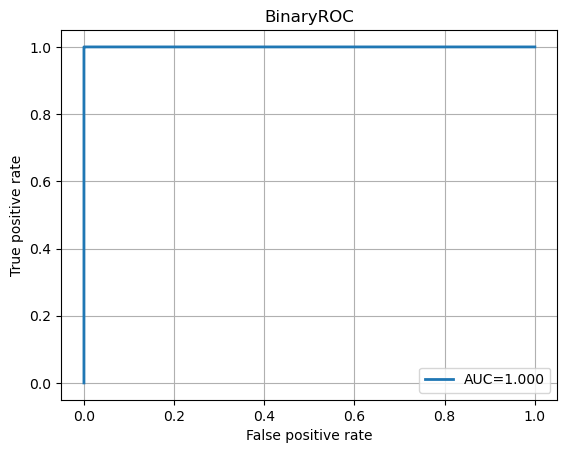

In [6]:
fig_, ax_ = metric.plot(score=True)